In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from files.Simulation import Simulation
from files.Source import Source
from files.Observer import Observer
from files.Propagator import Propagator
from files.Observer import TimeEvolutionObserverLog
from plot.Trajectory import Trajectory
from plot.Statistics import Statistics

## Simulation setup

#### Simulation setup

In [2]:
sim = Simulation()

start simulation


#### Source 

In [3]:
nr_particles = 10**1
source_pos = np.array([0.0, 0.0, 0.0], dtype=np.float32)
mfp = np.array([3.75*10**13/4.0, 3.75*10**13/4.0, 7.2*10**13])  # [m]
delta_rho_div_phi = 1 # (delta_r_rho / delta_r_phi)
gyro_radius = 10**11 # [m]; 1pc

source = Source(gyro_radius, mfp, source_pos, nr_particles)
sim.add_source(source)

source


#### Propagator

In [5]:
nr_steps = 10**5
step_size = 0.5*10**10 # [m]
propagator = Propagator(nr_steps, step_size)
sim.add_propagator(propagator)

Propagator initialized


#### Observer

In [6]:
substeps = [False, False, True] # observe only steps (no substeps)
min_step = 1
max_step = nr_steps
nr_obs_steps = 100

observer = TimeEvolutionObserverLog(min_step, max_step, nr_obs_steps, substeps)
sim.add_observer(observer)

number steps:  89
observer


In [8]:
%time sim.run_simulation()
sim.save_data('data')

CPU times: user 785 ms, sys: 7.94 ms, total: 793 ms
Wall time: 789 ms


## Analyze statistics


init statistics plotting class


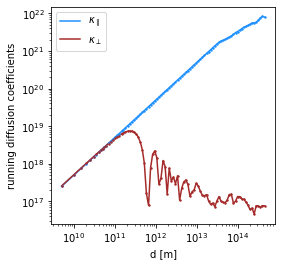

In [9]:
df = pd.read_pickle("data.pkl")
df_time_evolution_observer = df.loc[df['radius'] == -1.0]
dimensions = 3
sta = Statistics(df_time_evolution_observer, dimensions)
errors = False
df_kappas = sta.plot_diffusion_coefficients(errors)